In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

import warnings

warnings.simplefilter("ignore")


In [3]:
# Load data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
train_df.head()

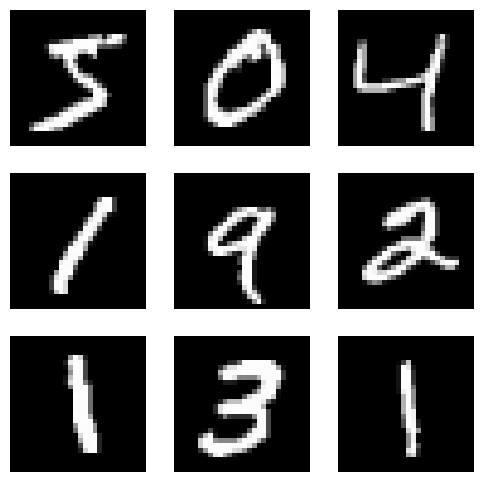

In [4]:
# Display some sample images from the training set
fig, axs = plt.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):
        img = train_df.iloc[i*3+j, 1:].values.reshape(28,28)
        axs[i,j].imshow(img, cmap='gray')
        axs[i,j].axis('off')
plt.show()

In [5]:
# Split data into features and target
X_train = train_df.drop('label', axis=1) 
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [6]:
# Data preprocessing - normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)

In [8]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_preds)

In [9]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [15]:
# Evaluate models with cross-validation
num_folds = 3
svm_cv_acc = cross_val_score(svm, X_train, y_train, cv=num_folds).mean()
logreg_cv_acc = cross_val_score(logreg, X_train, y_train, cv=num_folds).mean() 
rf_cv_acc = cross_val_score(rf, X_train, y_train, cv=num_folds).mean()

In [14]:
# # Evaluate models with cross-validation
# svm_cv_acc = cross_val_score(svm, X_train, y_train, cv=5).mean()
# logreg_cv_acc = cross_val_score(logreg, X_train, y_train, cv=5).mean() 
# rf_cv_acc = cross_val_score(rf, X_train, y_train, cv=5).mean()

In [16]:
# Print results
print("SVM Accuracy: ", svm_acc)
print("Logistic Regression Accuracy: ", logreg_acc)
print("Random Forest Accuracy: ", rf_acc)
print("---------------------------------------------")
print("SVM CV Accuracy: ", svm_cv_acc)
print("Logistic Regression CV Accuracy: ", logreg_cv_acc)
print("Random Forest CV Accuracy: ", rf_cv_acc)

# Select best model based on CV evaluation
best_model = rf

SVM Accuracy:  0.9792
Logistic Regression Accuracy:  0.9255
Random Forest Accuracy:  0.9701
---------------------------------------------
SVM CV Accuracy:  0.9749
Logistic Regression CV Accuracy:  0.9151666666666666
Random Forest CV Accuracy:  0.9651833333333334


In [17]:
# SVM model evaluation
svm_report = classification_report(y_test, svm_preds)
svm_confusion = confusion_matrix(y_test, svm_preds)

In [18]:
print("SVM Classification Report:")
print(svm_report)
print("SVM Confusion Matrix:")
print(svm_confusion)
print("---------------------------------------------")

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

SVM Confusion Matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2  

In [19]:
# Logistic Regression model evaluation
logreg_report = classification_report(y_test, logreg_preds)
logreg_confusion = confusion_matrix(y_test, logreg_preds)

In [20]:
print("Logistic Regression Classification Report:")
print(logreg_report)
print("Logistic Regression Confusion Matrix:")
print(logreg_confusion)
print("---------------------------------------------")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Logistic Regression Confusion Matrix:
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 

In [21]:
# Random Forest model evaluation
rf_report = classification_report(y_test, rf_preds)
rf_confusion = confusion_matrix(y_test, rf_preds)

In [22]:
print("Random Forest Classification Report:")
print(rf_report)
print("Random Forest Confusion Matrix:")
print(rf_confusion)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Confusion Matrix:
[[ 970    0    0    0    0    2    4    1    3    0]
 [   0 1122    4    3    1    2    2    0    1    0]
 [   5    0  998    6    3    0    4   10    6    0]
 [   0    0  

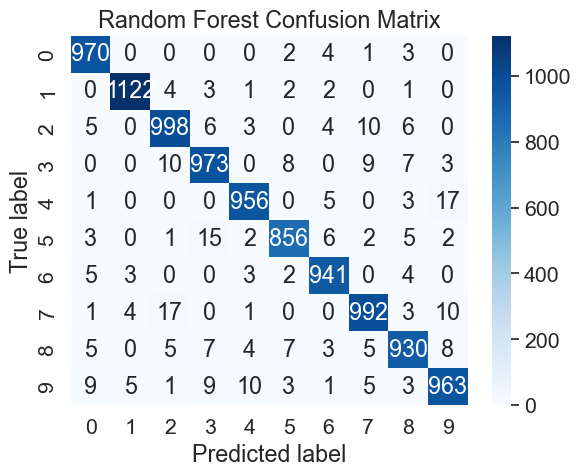

In [23]:
# Plot confusion matrix for the best model
sns.set(font_scale=1.4)
sns.heatmap(rf_confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
# SVM with GridSearch cross-validation
svm = SVC()
# params = {'C': [0.1, 1, 10, 100], 
#           'gamma': [0.001, 0.01, 0.1, 1]}
params = {'C': [0.1, 10], 'gamma': [0.01, 1]}
svm_grid = GridSearchCV(svm, param_grid=params, cv=2 , n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

In [ ]:
print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM Score:", svm_grid.best_score_)

In [ ]:
# Logistic Regression with built-in CV
logreg = LogisticRegressionCV(Cs=10, cv=3)
logreg.fit(X_train_scaled, y_train)

In [ ]:
print("Best Logistic Regression C:", logreg.C_)

In [ ]:
# Random Forest with GridSearch
rf = RandomForestClassifier()
params = {'n_estimators': [10, 100, 500],
          'max_depth': [5, 8, 15]} 
rf_grid = GridSearchCV(rf, param_grid=params, cv=3)
rf_grid.fit(X_train_scaled, y_train)

In [ ]:
print("Best RF Params:", rf_grid.best_params_)
print("Best RF Score:", rf_grid.best_score_)